## Flight Fare Prediction ##
### deep199907@gmail.com
### Deepak Arumugam Vivekanandan ###

---



In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [3]:
#Mounting the Google Drive to import the dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [5]:
# Reading the dataset using pandas
df=pd.read_csv("Flight Fare Prediction.csv")
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [6]:
# First five rows of the dataset
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [7]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

In [8]:
# Last five rows of the dataset
df.tail()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980
452087,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [9]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [10]:
## Describing the whole dataset
df.describe(include= "all")

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
count,452088,452088,452088,452088,452088,452088,452088,452088,452088,452088,452088.000000,452088.000000,452088.000000
unique,50,7,9,1405,4,7,4,3,4,7,NaN,NaN,NaN
top,2023-01-31,Monday,Vistara,UK-936,Economy,Delhi,6 AM - 12 PM,1-stop,After 6 PM,Mumbai,NaN,NaN,NaN
freq,9824,72220,231490,5506,252033,83153,184980,369650,200266,82995,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.349222,25.627902,22840.100890
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.431478,14.300846,20307.963002
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,1.000000,1307.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.583300,13.000000,8762.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.333300,26.000000,13407.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.500000,38.000000,35587.000000


## Descriptive stats of the data
### The total count of the Journey in all airlines - 440087
### Top values says that we have the Flightfare data from 31st January 2023, By seeing the unique values of the airlines we can able to know that this data contains 9 different airlines with 4 classes in each airline. Source and Destination denotes that this dataset consists of 7 sites are the primary hubs that operate the aviation service for passengers on domestic flights.

### In this data some of the values are 'NaN' it's only because of the categorical variables present in the dataset. using those values we can't able to calculate min, max ,and standard deviation. But it will be helpfull to find the unique values in the data.

In [11]:
# Describing the data with only numerical columns in the data
df.describe(include= [np.number])

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [12]:
# Checking the missing values
df.isna().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [13]:
# Creating a Back up File
df_bk=df.copy()

In [14]:
# Last five rows of the dataset
df.tail()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980
452087,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


Inference: By seeing the last five data points we can able to know there are duplicate data presesnt in the dataset.

In [15]:
# Describing the dataset
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [16]:
# Seeing the shape of the dataset.
df.shape

(452088, 13)

In [17]:
# Dropping the duplicate values in the data.
df.drop_duplicates( keep=False, inplace=True)
df = df.reset_index(drop = True)
df.shape


(440087, 13)

In [18]:
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440082,2023-03-06,Monday,Vistara,UK-966,Business,Ahmedabad,After 6 PM,1-stop,After 6 PM,Chennai,26.1667,50,60453
440083,2023-03-06,Monday,Vistara,UK-936,Business,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Chennai,7.9167,50,61302
440084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,61302
440085,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,65028


## Inference : Duplicates are removed from the dataset in the preprocessing stage and starting from finding the duplicates and before that there was 4,52,088 rows after romiving duplicates it ended up in 4,40,087 rows. Nearly 12,000 values are duplicated.

In [19]:
df.Airline.value_counts()
df.Flight_code.value_counts()


Flight_code
UK-936     4853
UK-706     4737
UK-918     4577
UK-926     4253
UK-832     4053
           ... 
G8-7001       1
6E-6835       1
QP-1301       1
G8-390        1
6E-7292       1
Name: count, Length: 1405, dtype: int64

## Count of Trips by each Airlines

In [20]:
df1=df.Airline.value_counts()
df.Airline.value_counts()

Airline
Vistara        221945
Air India      117385
Indigo          65659
AirAsia         15764
GO FIRST        10786
SpiceJet         5863
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: count, dtype: int64

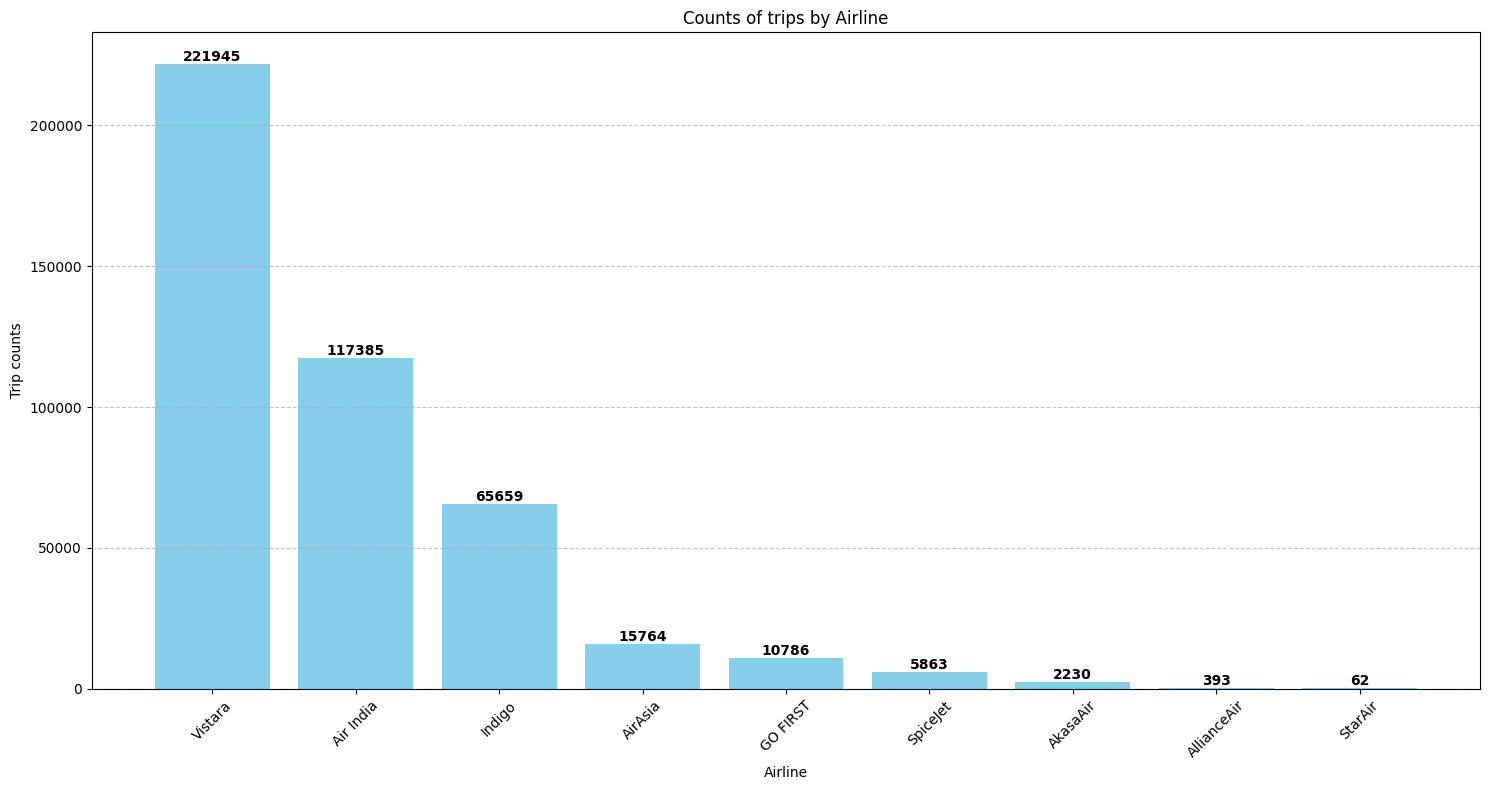

In [21]:
# Plotting the bar chart
plt.figure(figsize=(15, 8))  # Set the figure size
bars = plt.bar(df1.index, df1.values, color='skyblue')  # Create a bar chart

plt.title('Counts of trips by Airline')  # Title of the graph
plt.xlabel('Airline')  # X-axis label
plt.ylabel('Trip counts')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the labels on the x-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid to the y-axis for better readability

# Adding the text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()  # Adjust subplots to give some padding
plt.show()

## INFERENCE : The distribution of trip counts among Indian airlines is depicted in the bar chart. With a total of 221,945 flights, Vistara leads the market, demonstrating its considerable presence. With 117,385 and 65,659 trips, respectively, Air India and IndiGo also exhibit a high level of activity. Smaller carriers, such as Alliance Air and Star Air, on the other hand, make up very little of the total number of trips, indicating a smaller operational scale. The dominance of major airlines over smaller carriers in terms of flight frequency is highlighted by this disparity, which may have an impact on industry competition and fare pricing.

##  Count of flight owned bt each Airline

In [22]:
df1=df.groupby(['Airline','Flight_code'],as_index=False).sum()
flights = df1.Airline.value_counts()
flights

Airline
Indigo         702
Air India      171
Vistara        165
AirAsia        106
GO FIRST       104
SpiceJet        92
AkasaAir        51
AllianceAir     10
StarAir          4
Name: count, dtype: int64

In [64]:

df_flights = flights.reset_index()
df_flights.columns = ['Airline', 'Flight_Count']

fig = px.line(df_flights, x='Airline', y='Flight_Count', title='Flight Counts by Airline',
              labels={'Flight_Count': '&lt;b&gt;Number of Flights&lt;/b&gt;', 'Airline': '&lt;b&gt;Airline&lt;/b&gt;'},
              markers=True)

fig.update_traces(textposition='top center', mode='lines+markers+text', text=df_flights['Flight_Count'])

fig.update_layout(
    title_font_size=20,
    xaxis=dict(
        title='Airline',
        title_font=dict(size=18, family='Arial', color='RebeccaPurple'),
        tickfont=dict(size=16, family='Arial', color='RebeccaPurple')
    ),
    yaxis=dict(
        title='Number of Flights',
        title_font=dict(size=18, family='Arial', color='RebeccaPurple'),
        tickfont=dict(size=16, family='Arial', color='RebeccaPurple')
    ),
    legend=dict(
        font=dict(size=16, family='Arial', color='RebeccaPurple')
    ),
    font=dict(
        family="Arial",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

### INFERENCE: The flight counts by airline are displayed on the line graph, which demonstrates the notable differences between the carriers. With 702 flights, IndiGo has the most, indicating its strong market position. With 471 and 165 flights, respectively, Air India and Vistara come next, showing robust but smaller-scale operations in contrast to IndiGo. With only 4 flights, smaller airlines like Star Air demonstrate how the market is concentrated among a small number of dominant players. IndiGo's approach of continuing high-frequency operations is highlighted by this distribution, which probably increases its competitiveness and market share.

In [25]:
df2 = df.groupby(['Flight_code','Airline','Class'],as_index=False).count()
df2['Class'].value_counts()

Class
Economy            1401
Business            295
Premium Economy     137
First                 3
Name: count, dtype: int64

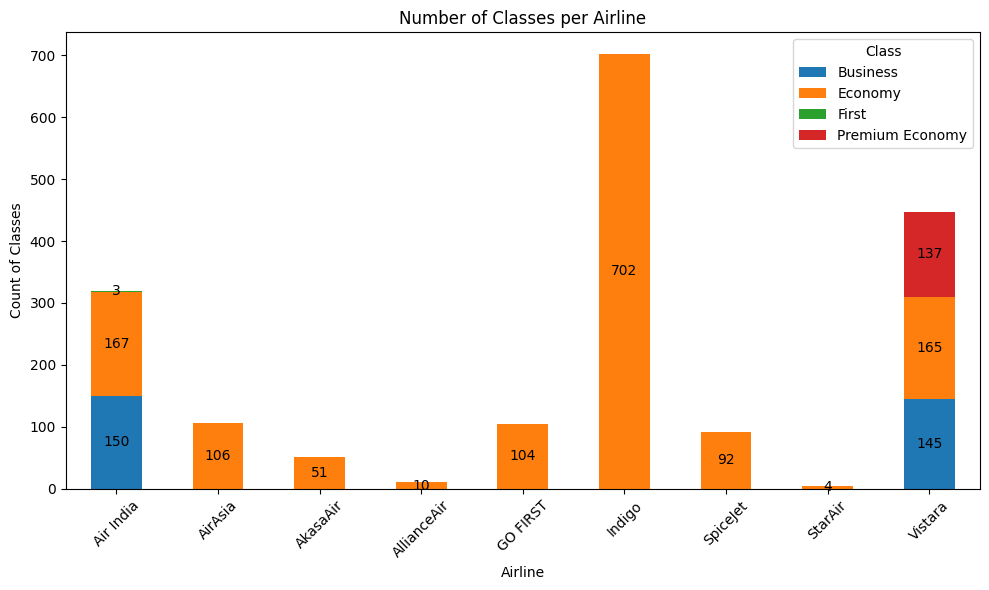

In [26]:
# Grouping data by 'Airline' and 'Class' and counting occurrences
class_counts = df2.groupby(['Airline', 'Class']).size().unstack(fill_value=0)

# Plotting
ax = class_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Classes per Airline')
plt.xlabel('Airline')
plt.ylabel('Count of Classes')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.legend(title='Class')
plt.tight_layout()

# Adding text labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add annotations if there is a visible bar segment
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

### INFERENCE: The bar graph illustrates the range of seating classes that different airlines provide. Vistara is a leader in variety, providing a substantial selection of seats in business, economy, premium economy, and first class, demonstrating its dedication to meeting the needs of a wide range of traveler preferences. IndiGo's high number of 702 economy seats, which correspond to its low-cost carrier model, indicate that it primarily offers economy class. Although they offer fewer premium options, other airlines such as Air India and AirAsia also offer a variety. This distribution, in which Vistara positions itself as a full-service carrier, demonstrates the strategic alignment between airline service offerings and their target market segments.

<ipython-input-27-d6f3944db6b6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




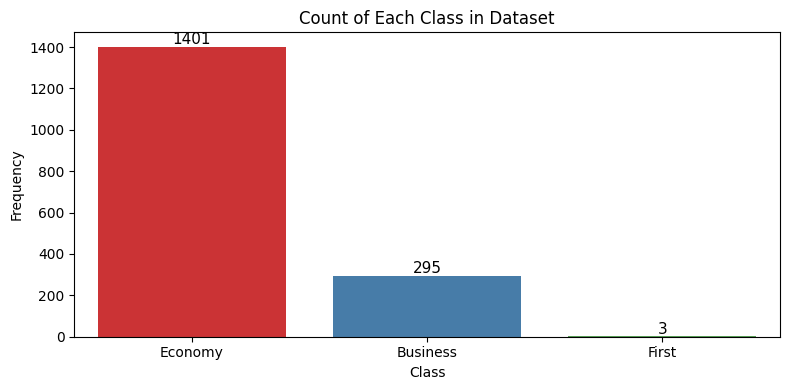

In [27]:
# Creating a bar chart using Seaborn
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Class', data=df2, palette='Set1', order=['Economy', 'Business', 'First'])

# Adding annotations to show counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Setting plot title and labels
plt.title('Count of Each Class in Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Adjust rotation if needed

# Show the plot
plt.tight_layout()
plt.show()

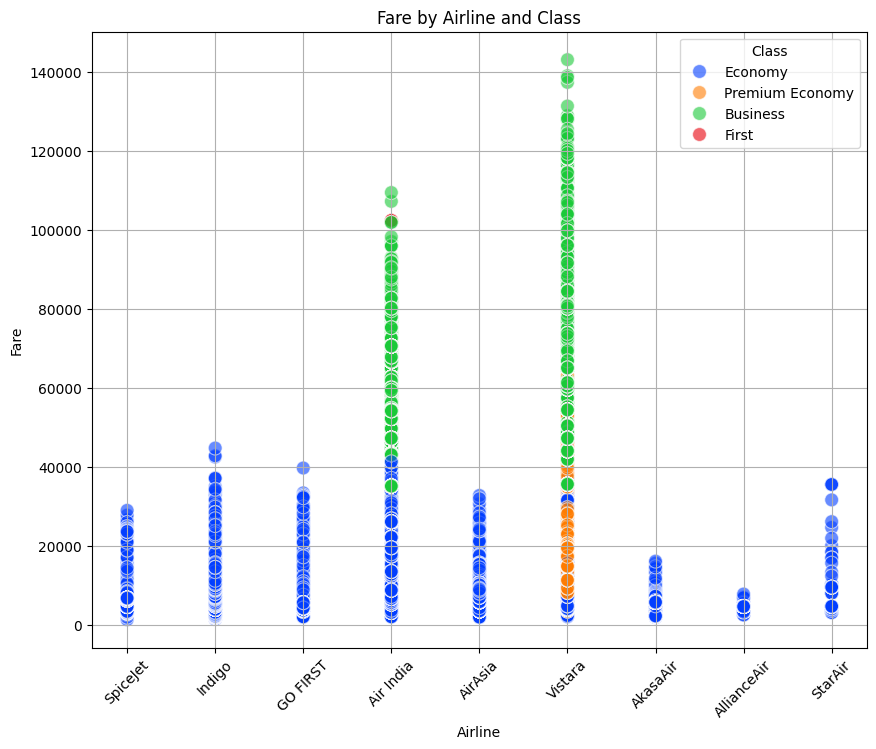

In [28]:
plt.figure(figsize=(10,8))
# Creating a scatter plot using Seaborn with a hue for 'Class'
sns.scatterplot(x='Airline', y='Fare', data=df, hue='Class', palette='bright', s=100, alpha=0.6)

# Setting plot title and grid

plt.title('Fare by Airline and Class')
plt.grid(True)

# Adjust x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()

<ipython-input-29-8428b484d850>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-8428b484d850>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




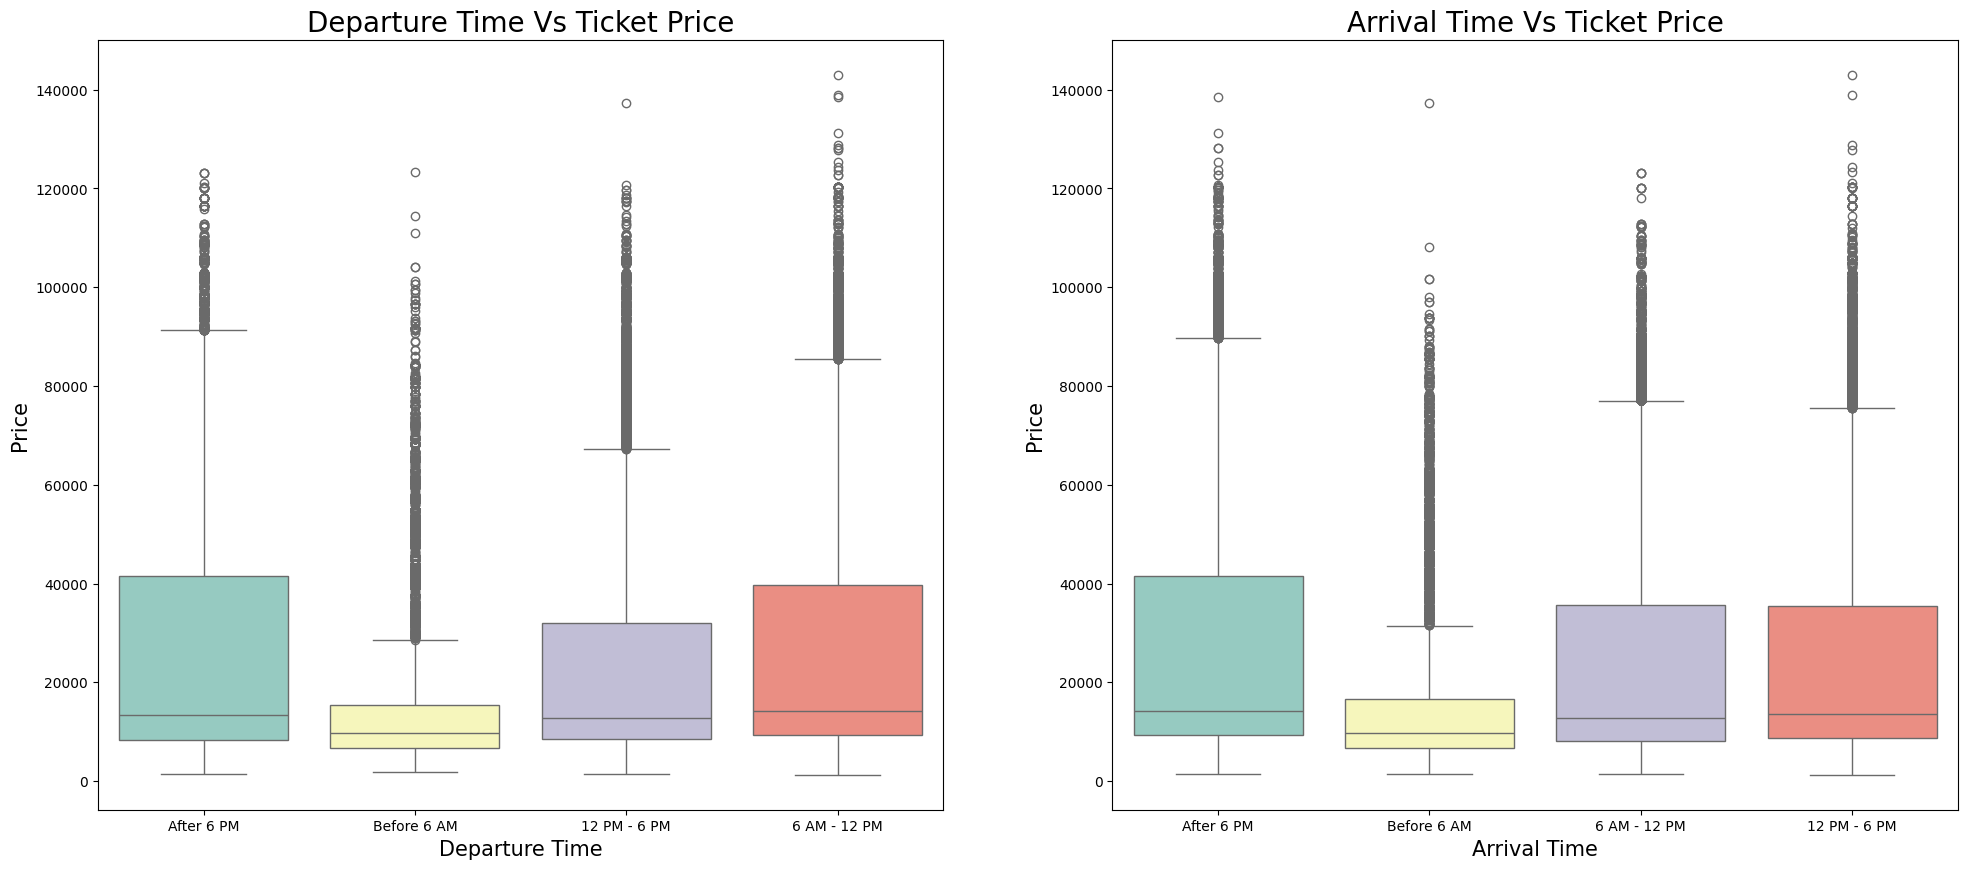

In [29]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Departure',y='Fare',data=df,palette='Set3')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Arrival',y='Fare',data=df,palette='Set3')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

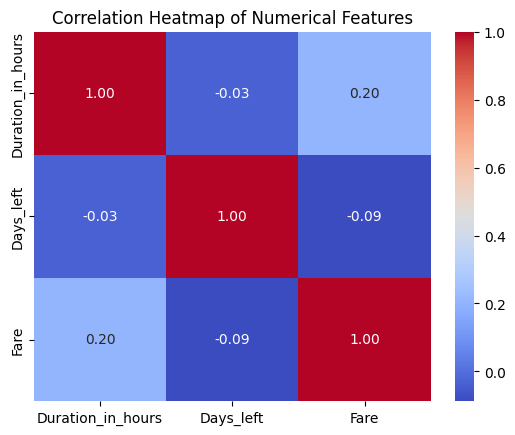

In [31]:
# Assuming 'df' is your DataFrame
correlation_matrix = df[['Duration_in_hours', 'Days_left', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [32]:
  #sns.pairplot(df, vars=['Duration_in_hours', 'Days_left', 'Fare'], hue='Class')
  #plt.suptitle('Pairwise Plot of Numerical Features', y=1.02)
  #plt.show()

<ipython-input-33-63fb50143afe>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




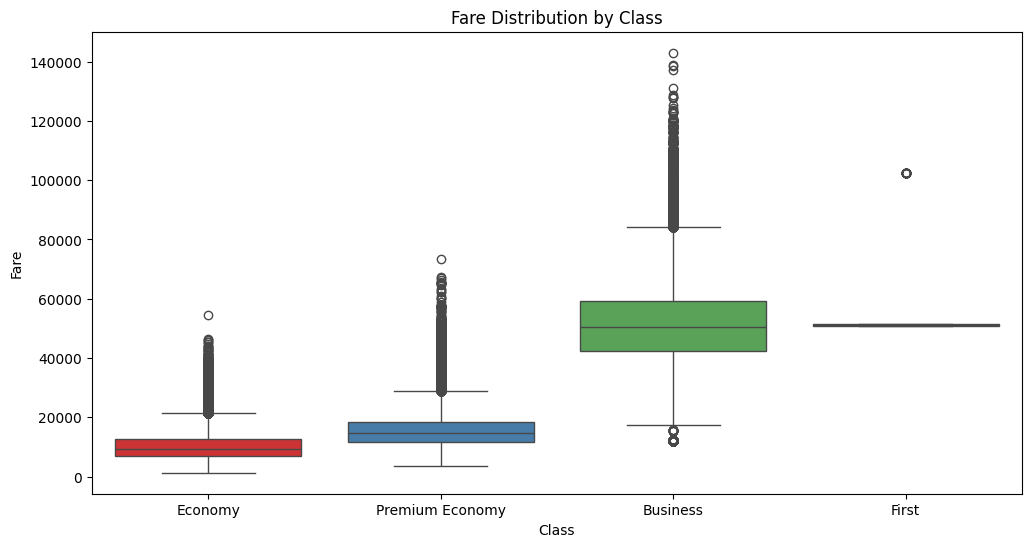

<ipython-input-33-63fb50143afe>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




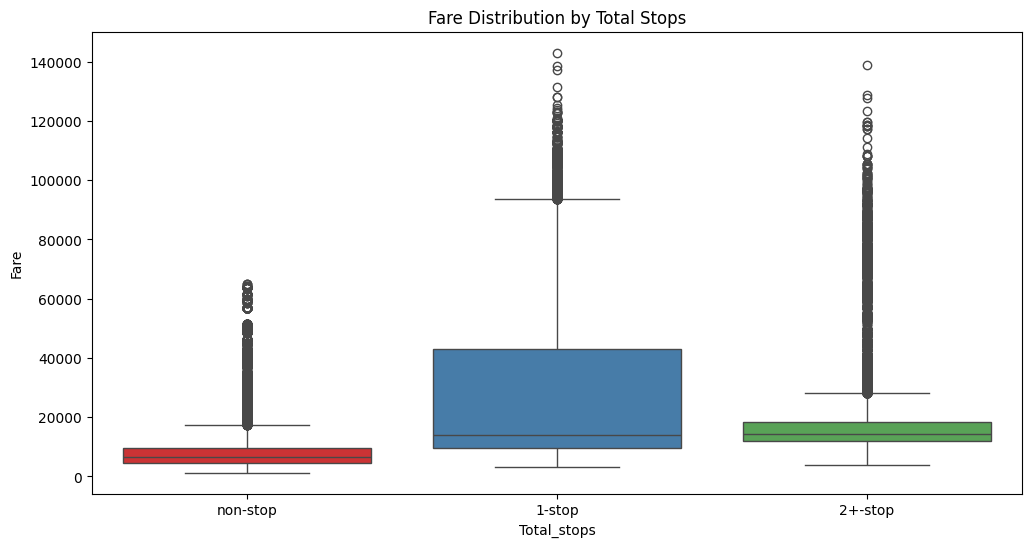

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Fare', data=df, palette='Set1')
plt.title('Fare Distribution by Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_stops', y='Fare', data=df, palette='Set1')
plt.title('Fare Distribution by Total Stops')
plt.show()

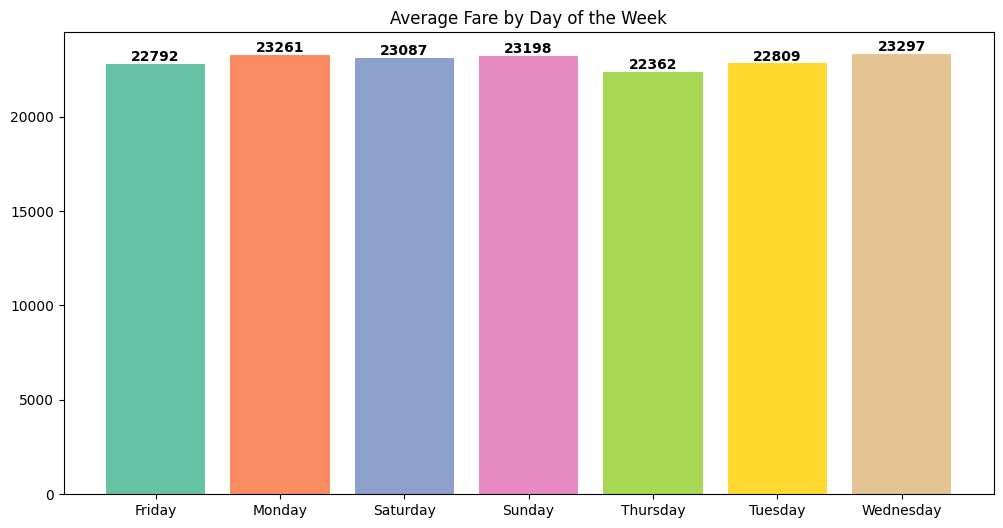

In [34]:
# Assuming 'df' is your DataFrame and it's properly loaded with 'Journey_day' and 'Fare'
average_fares = df.groupby('Journey_day')['Fare'].mean().reset_index()

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494']

# Now, plot the average fares using matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(average_fares['Journey_day'], average_fares['Fare'], color=colors)


# Adding title
plt.title('Average Fare by Day of the Week')

# Adding the text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontweight='bold')

plt.show()

## Correlation Heatmap

In [35]:
new_df=df.drop(columns='Date_of_journey',  inplace=True)
new_df=df.drop(columns='Journey_day',  inplace=True)
new_df=df.drop(columns='Flight_code',  inplace=True)
new_df=df.drop(columns='Class',  inplace=True)
new_df=df.drop(columns='Departure',  inplace=True)
new_df=df.drop(columns='Total_stops',  inplace=True)
new_df=df.drop(columns='Arrival',  inplace=True)
new_df=df.drop(columns='Duration_in_hours',  inplace=True)
new_df=df.drop(columns='Days_left',  inplace=True)
new_df

In [36]:
df

,Airline,Source,Destination,Fare
0,SpiceJet,Delhi,Mumbai,5335
1,Indigo,Delhi,Mumbai,5899
2,GO FIRST,Delhi,Mumbai,5801
3,SpiceJet,Delhi,Mumbai,5794
4,Air India,Delhi,Mumbai,5955
...,...,...,...,...
440082,Vistara,Ahmedabad,Chennai,60453
440083,Vistara,Ahmedabad,Chennai,61302
440084,Vistara,Ahmedabad,Chennai,61302
440085,Vistara,Ahmedabad,Chennai,65028


### Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [38]:
label_encoder = preprocessing.LabelEncoder()

In [39]:
# Converting the airline column from categorical to numerical variable
df['Airline']= label_encoder.fit_transform(df['Airline'])

df['Airline'].unique()

array([6, 5, 4, 0, 1, 8, 2, 3, 7])

In [40]:
# Converting the Destination column from categorical to numerical variable
df['Destination']= label_encoder.fit_transform(df['Destination'])

df['Destination'].unique()

array([6, 1, 4, 5, 2, 0, 3])

In [41]:
# Converting the Source column from categorical to numerical variable
df['Source']= label_encoder.fit_transform(df['Source'])

df['Source'].unique()

array([3, 6, 1, 4, 5, 2, 0])

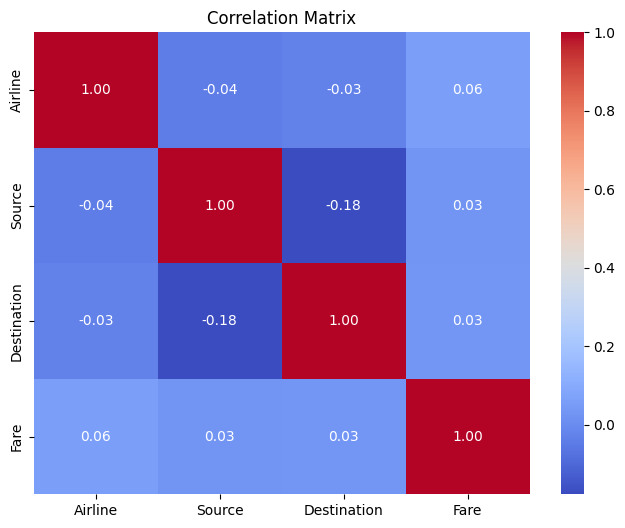

In [42]:
 df_corr = df.corr()

plt.figure(figsize=(8, 6))  # Optional: Sets the figure size for better readability
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')  # Optional: Adds a title to the heatmap
plt.show()


In [43]:
# Dividing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['Fare'],axis=1)
y=df['Fare']

In [44]:
# Splitting the Data into Training set and Testing Set in 70% and 30%.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((308060, 3), (132027, 3), (308060,), (132027,))

In [45]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(x_train)
X_test=mmscaler.fit_transform(x_test)
X_train=pd.DataFrame(x_train)
X_test=pd.DataFrame(x_test)

### Linear Regression


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model, metrics
from tqdm import tqdm

## Linear Regression.

In [47]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-square
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-square
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of independent variables
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-square:", r2)
print("Adjusted R-square:", adj_r2)


Mean Absolute Error (MAE): 16880.084411998825
Root Mean Squared Error (RMSE): 20390.03024710076
R-square: 0.005534989094884368
Adjusted R-square: 0.005512391554813978


### Decision Tree Regressor.

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-square
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-square
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of independent variables
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-square:", r2)
print("Adjusted R-square:", adj_r2)

Mean Absolute Error (MAE): 14606.74507580186
Root Mean Squared Error (RMSE): 18455.970709175952
R-square: 0.18524402871863643
Adjusted R-square: 0.18522551476338744


## Decision Tree Regressor HYPERAMETER TUNING

In [49]:

from sklearn.metrics import mean_squared_error, r2_score
# Initialize the DecisionTreeRegressor with the best parameters found
best_model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=3, min_samples_split=3, max_features='log2', random_state=42)

# Fit the model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-square:", r2)
print("Adjusted R-square:", adj_r2)

Mean Absolute Error (MAE): 14606.771368062353
Root Mean Squared Error (RMSE): 18455.973005554653
R-square: 0.18524382596708222
Adjusted R-square: 0.18522551476338744


### Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-square
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-square
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-square:", r2)
print("Adjusted R-square:", adj_r2)

Mean Absolute Error (MAE): 14605.495406251292
Root Mean Squared Error (RMSE): 18456.175102147863
R-square: 0.18522598238348498
Adjusted R-square: 0.18520746801816346


###  XGBoost Regressor

In [51]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-square
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-square
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-square:", r2)
print("Adjusted R-square:", adj_r2)

Mean Absolute Error (MAE): 14824.088912623041
Root Mean Squared Error (RMSE): 18577.117002805666
R-square: 0.17451269197244534
Adjusted R-square: 0.1744939341656686


### Extra trees Regressor

In [52]:
from sklearn.ensemble import ExtraTreesRegressor


# Initialize the ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-square
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-square
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-square:", r2)
print("Adjusted R-square:", adj_r2)

Mean Absolute Error (MAE): 14606.772776303234
Root Mean Squared Error (RMSE): 18455.975301698105
R-square: 0.18524362323627286
Adjusted R-square: 0.1852251092718099


In [53]:
# Define the data as a list of dictionaries where each dictionary represents the metrics for one model
data = [
    {
        'Model Name': 'Linear Regression',
        'MAE': 16880.084411998825,
        'RMSE': 20390.03024710076,
        'R-square': 0.005534989094884368,
        'Adjusted R-square': 0.005512391554813978,
    },
    {
        'Model Name': 'Decision Tree Regressor',
        'MAE': 14606.74507580186,
        'RMSE': 18455.970709175952,
        'R-square': 0.18524402871863643,
        'Adjusted R-square': 0.18522551476338744,
    },
    {
        'Model Name': 'Random Forest Regressor',
        'MAE': 14605.495406251292,
        'RMSE': 18456.175102147863,
        'R-square': 0.18522598238348498,
        'Adjusted R-square': 0.18520746801816346,
    },
    {
        'Model Name': 'Extra Trees Regressor',
        'MAE': 14606.772776303234,
        'RMSE': 18455.975301698105,
        'R-square': 0.18524362323627286,
        'Adjusted R-square': 0.1852251092718099

    },
    {
        'Model Name': 'XGBoost Regressor',
        'MAE': 14824.088912623041,
        'RMSE': 18577.117002805666,
        'R-square': 0.17451269197244534,
        'Adjusted R-square': 0.1744939341656686,
    }

]

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(data)

# Print the DataFrame in a tabular format
results_df

,Model Name,MAE,RMSE,R-square,Adjusted R-square
0,Linear Regression,16880.084412,20390.030247,0.005535,0.005512
1,Decision Tree Regressor,14606.745076,18455.970709,0.185244,0.185226
2,Random Forest Regressor,14605.495406,18456.175102,0.185226,0.185207
3,Extra Trees Regressor,14606.772776,18455.975302,0.185244,0.185225
4,XGBoost Regressor,14824.088913,18577.117003,0.174513,0.174494


<ipython-input-54-e349b3dfa2ed>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-e349b3dfa2ed>:13: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.

<ipython-input-54-e349b3dfa2ed>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-54-e349b3dfa2ed>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-e349b3dfa2ed>:18: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.

<ipython-input-54-e349b3dfa2ed>:20: UserWarning:

FixedFormatter should only be used together with FixedLocator

<i

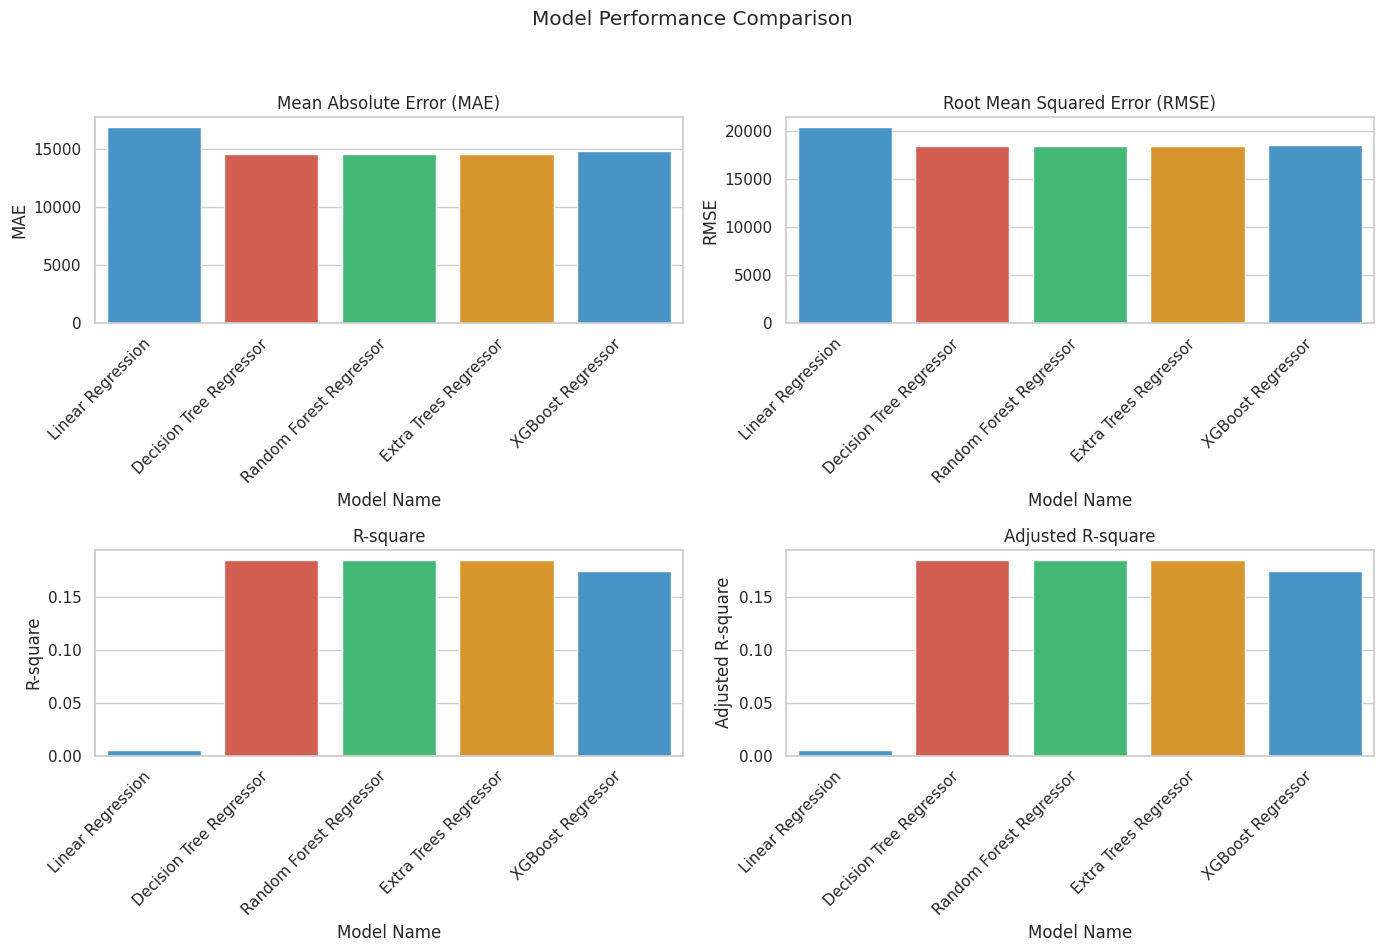

In [54]:
# Setting the plot style and color palette
sns.set(style="whitegrid")
sns.set_palette("muted")  # You can change "muted" to other palettes like "bright", "deep", "pastel", etc.

# Create a figure to contain the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison')

# Define a list of colors for each plot
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12"]  # Blue, Red, Green, Orange

# Plot Mean Absolute Error with custom colors
sns.barplot(ax=axes[0, 0], x='Model Name', y='MAE', data=results_df, palette=colors)
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Plot Root Mean Squared Error with custom colors
sns.barplot(ax=axes[0, 1], x='Model Name', y='RMSE', data=results_df, palette=colors)
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Plot R-square with custom colors
sns.barplot(ax=axes[1, 0], x='Model Name', y='R-square', data=results_df, palette=colors)
axes[1, 0].set_title('R-square')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Plot Adjusted R-square with custom colors
sns.barplot(ax=axes[1, 1], x='Model Name', y='Adjusted R-square', data=results_df, palette=colors)
axes[1, 1].set_title('Adjusted R-square')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Model evaluation




In [55]:
#Trainig the model with
model.fit(x_train, y_train)

# Predict the model with test data

y_pred = model.predict(x_test)

In [56]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [57]:
result.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Price_actual,Price_pred
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,5801,8046.798283
6,2023-01-16,Monday,Air India,AI-814,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.2500,1,5955,5955,25510.507417
7,2023-01-16,Monday,GO FIRST,G8-330,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.2500,1,5899,5899,8046.798283
11,2023-01-16,Monday,Indigo,6E-2208,Economy,Delhi,After 6 PM,1-stop,6 AM - 12 PM,Mumbai,8.6667,1,6390,6390,7854.671447
16,2023-01-16,Monday,AirAsia,I5-1228,Economy,Delhi,6 AM - 12 PM,1-stop,After 6 PM,Mumbai,9.5000,1,6872,6872,7002.467972


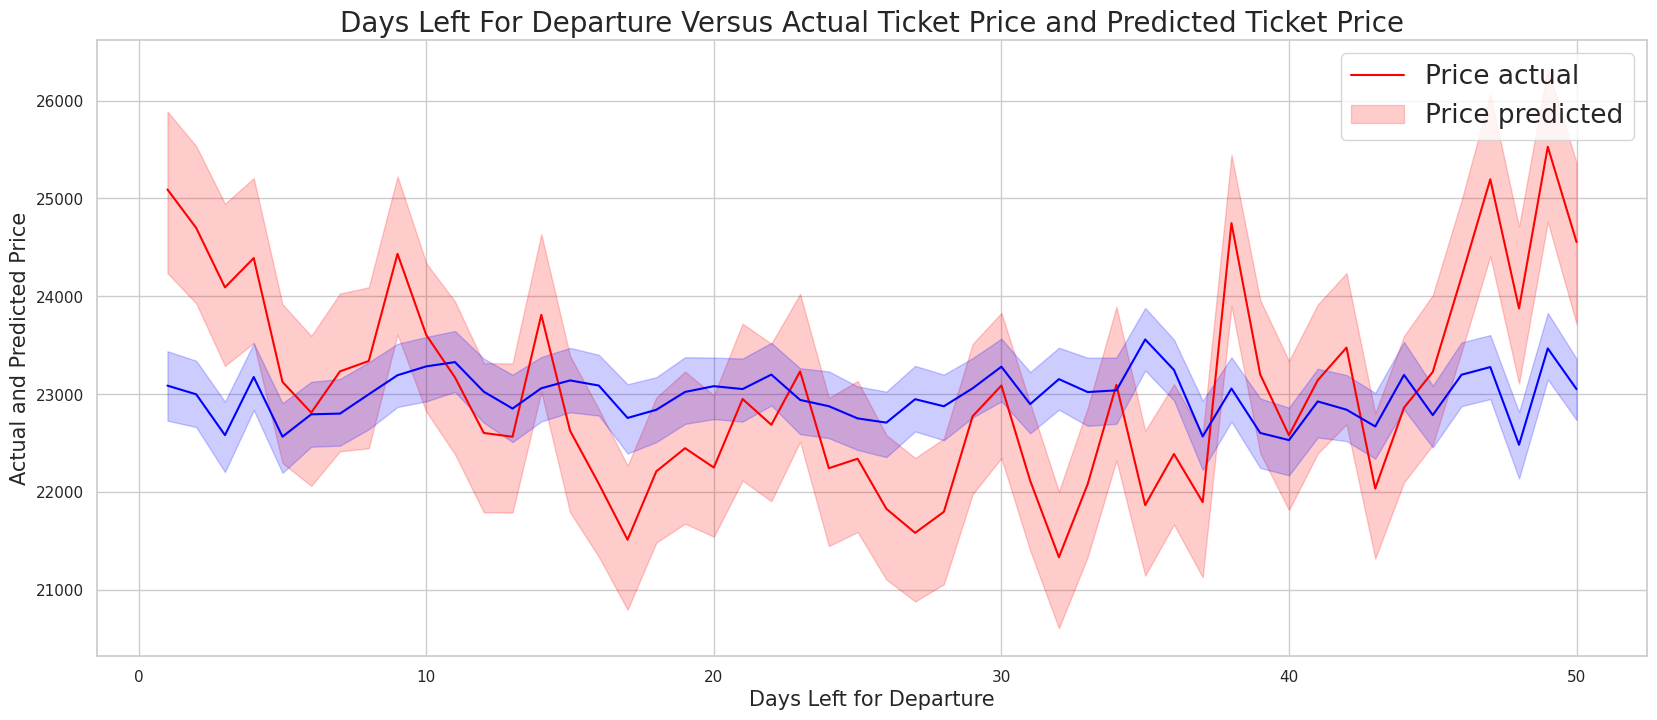

In [58]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='Days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='Days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

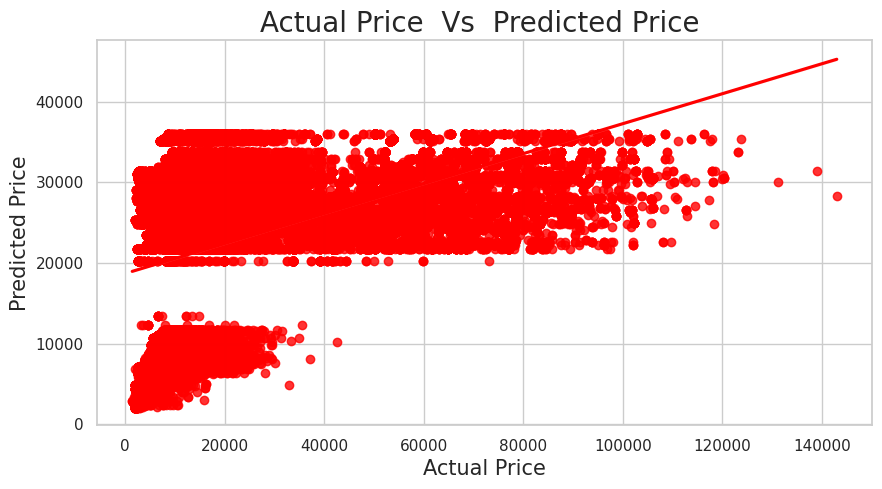

In [59]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='red')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()